In [9]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [imblearn]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the processed dataset
df = pd.read_csv('../processed/data.csv') 

#Analyze class imbalance for each AMP label
label_cols = ['is_anti_gram_positive', 'is_anti_gram_negative', 'is_antibacterial', 
              'is_antifungal', 'is_antiviral', 'is_antiparasitic', 'is_anticancer']

for col in label_cols:
    print(f"{col}:")
    print(df[col].value_counts(normalize=True).round(3))
    print(f"  Disbalance: {df[col].value_counts()[0]/df[col].value_counts()[1]:.1f}:1")
    print()



is_anti_gram_positive:
is_anti_gram_positive
1    0.685
0    0.315
Name: proportion, dtype: float64
  Дисбаланс: 0.5:1

is_anti_gram_negative:
is_anti_gram_negative
1    0.734
0    0.266
Name: proportion, dtype: float64
  Дисбаланс: 0.4:1

is_antibacterial:
is_antibacterial
1    0.858
0    0.142
Name: proportion, dtype: float64
  Дисбаланс: 0.2:1

is_antifungal:
is_antifungal
0    0.707
1    0.293
Name: proportion, dtype: float64
  Дисбаланс: 2.4:1

is_antiviral:
is_antiviral
0    0.96
1    0.04
Name: proportion, dtype: float64
  Дисбаланс: 23.8:1

is_antiparasitic:
is_antiparasitic
0    0.945
1    0.055
Name: proportion, dtype: float64
  Дисбаланс: 17.1:1

is_anticancer:
is_anticancer
0    0.946
1    0.054
Name: proportion, dtype: float64
  Дисбаланс: 17.6:1



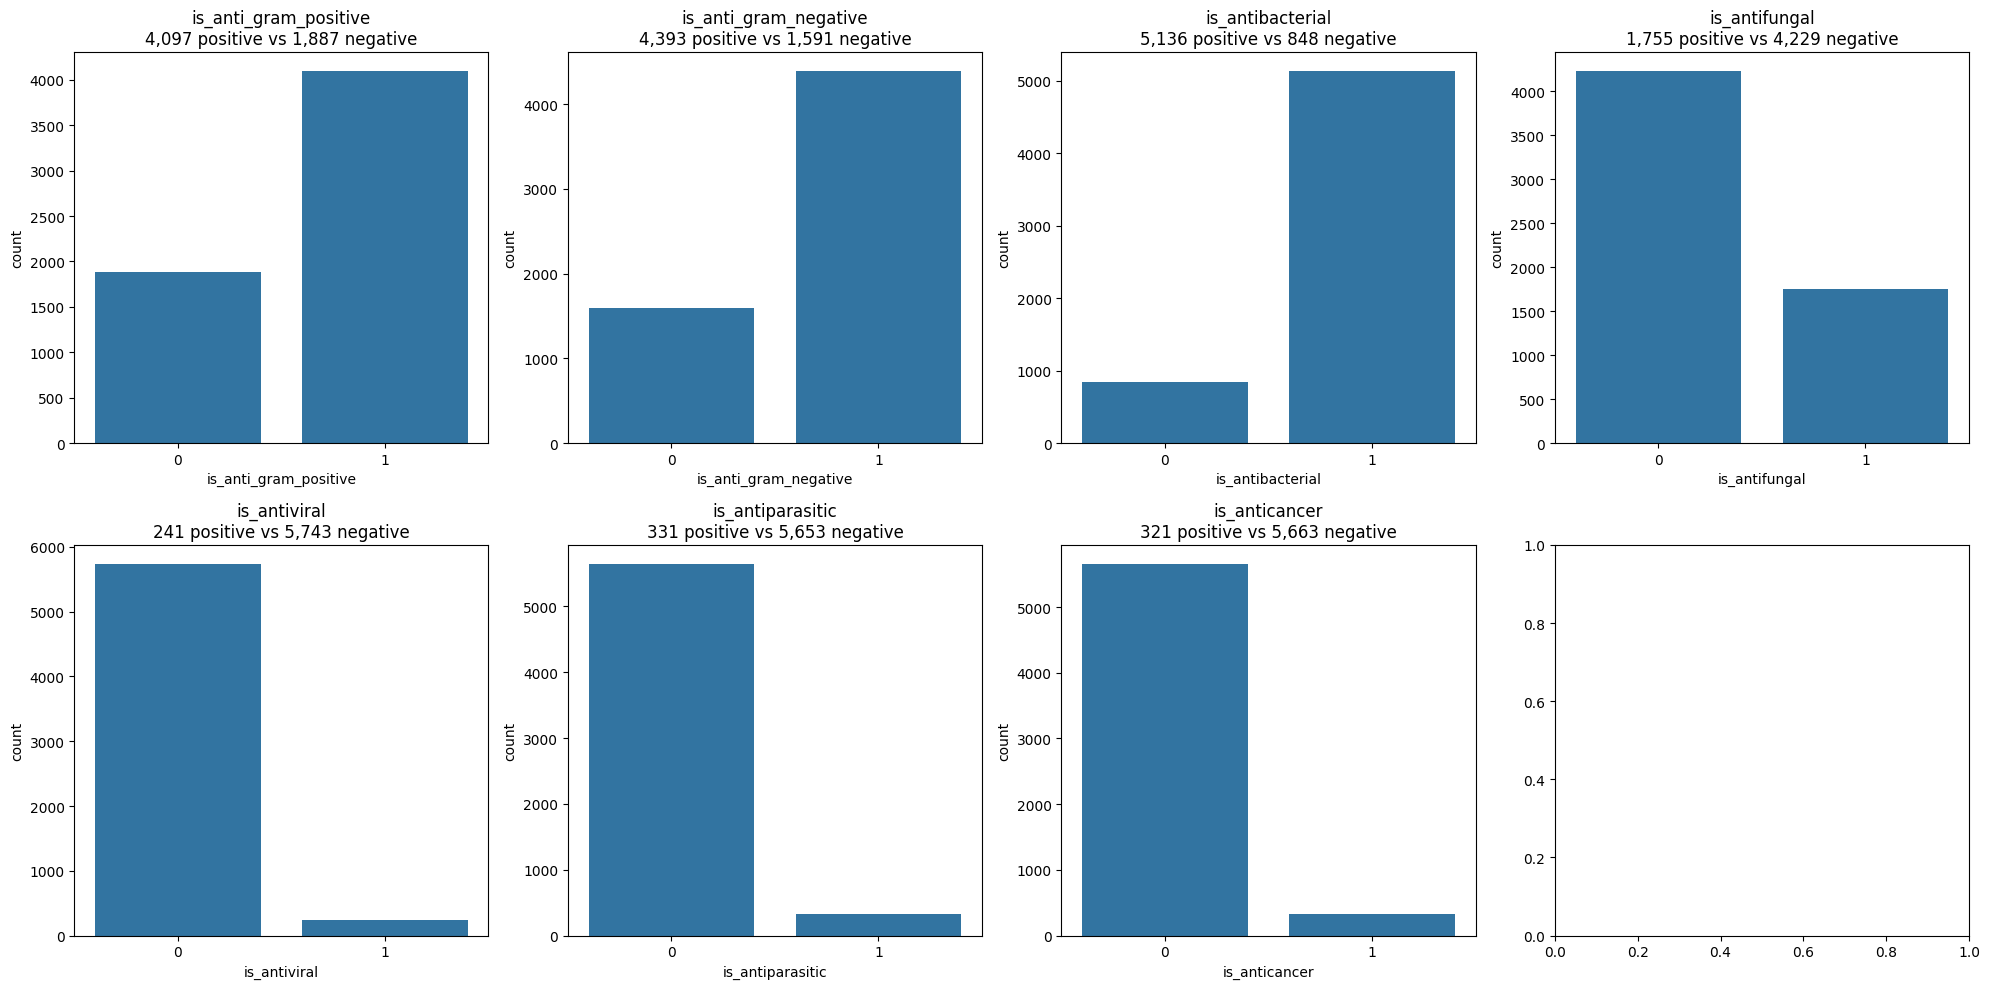

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(label_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}\n{df[col].value_counts()[1]:,} positive vs {df[col].value_counts()[0]:,} negative')

plt.tight_layout()
plt.show()


### Label correlation heatmap (multi-label AMP)

This cell computes the **Pearson correlation** between all binary label columns (0/1) and visualizes it as a heatmap.

- **Positive correlation (close to 1):** the two labels often appear together.
- **Negative correlation (close to -1):** when one label is 1, the other is usually 0.
- **Near 0:** little or no linear relationship between labels.

The heatmap helps check which labels **co-occur** or **rarely overlap** in the dataset.

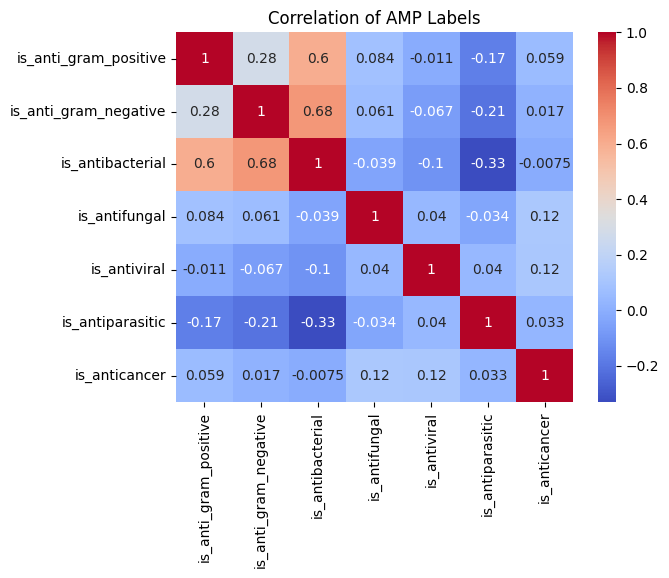

In [11]:
corr_matrix = df[label_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of AMP Labels')
plt.show()



- `is_anti_gram_positive` and `is_antibacterial` show a noticeable positive correlation — this is biologically reasonable, since activity against Gram-positive bacteria is a common part of “antibacterial” activity.
- `is_anti_gram_negative` is also positively correlated with `is_antibacterial` for the same reason.
- Most other label pairs have correlations close to 0, meaning they co-occur rarely or have little relationship in this dataset.
- Some pairs show negative correlation (e.g., `is_antibacterial` vs `is_antiparasitic`), suggesting these activities are less likely to be labeled together in the collected data.

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.multioutput import MultiOutputClassifier

# For highly imbalance classes (ratio > 10:1)
imbalanced_cols = [col for col in label_cols 
                  if df[col].value_counts()[0]/df[col].value_counts()[1] > 10]

print(f"Need to balance: {imbalanced_cols}")


Need to balance: ['is_antiviral', 'is_antiparasitic', 'is_anticancer']


In [ ]:
# For simplicity, we will only balance the 'is_antiviral' class
viral = pd.read_csv('antiviral.txt', sep='\t', encoding='latin1')
viral[['Activity', 'Sequence']].to_csv('../processed/viral.csv', index=False)


In [ ]:
antiparastic = pd.read_csv('antiparastic.txt', sep='\t', encoding='latin1')
antiparastic[['Activity', 'Sequence']].to_csv('../processed/antiparasitic.csv', index=False)

In [34]:
anticancer = pd.read_csv('anticancer.txt', sep='\t', encoding='latin1')
anticancer[['Activity', 'Sequence']].to_csv('../processed/anticancer.csv', index=False)